In [1]:
# Import statements
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import requests
import seaborn as sns

from datetime import datetime
from functools import reduce

%matplotlib inline

# Gather

In [2]:
# Load the enhanced twitter archive file we were given
twitter1 = pd.read_csv('twitter-archive-enhanced-2.csv')

In [3]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)


In [4]:
# Load the image predictions file
images = pd.read_csv('image_predictions.tsv', sep = '\t')

In [6]:
import tweepy

In [7]:
#https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

auth = tweepy.OAuthHandler('5Uur0mo4ol2kB8yhtZ1VxXS0u', 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH')
auth.set_access_token('303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB', 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [10]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in twitter1['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

In [11]:
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [12]:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [81]:
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        twitter2 = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])


In [82]:
twitter2.head(2)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,36157,7699,8788448,16,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,31178,5694,8788448,16,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L


# Assess

In [83]:
twitter1.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
512,811744202451197953,NaN,NaN,2016-12-22 01:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Halo. She likes watermelon. 13/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811744202...,13,10,Halo,None,None,None,None
974,750056684286914561,NaN,NaN,2016-07-04 20:00:23 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Jameson. He had a few too many in the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750056684...,11,10,Jameson,None,None,None,None
1423,697995514407682048,NaN,NaN,2016-02-12 04:07:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Dammit hooman quit playin I jus wanna wheat t...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/697995514...,11,10,None,None,None,None,None


In [84]:
twitter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [85]:
twitter1['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
715360349751484417    1
666817836334096384    1
794926597468000259    1
673705679337693185    1
700151421916807169    1
Name: tweet_id, Length: 2356, dtype: int64

In [86]:
twitter1['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [87]:
twitter1['text'].value_counts()

This is Traviss. He has no ears. Two rare dogs in background. I bet they all get along nicely. 7/10s I'd pet all https://t.co/Viu56hVhhP                       1
Meet Olive. He comes to spot by tree to reminisce of simpler times and truly admire his place in the universe. 11/10 https://t.co/LwrCwlWwPB                   1
RT @dog_rates: Meet Fizz. She thinks love is a social construct consisting solely of ideals perpetuated by mass media 11/10 woke af https:/…                   1
Good teamwork between these dogs. One is on lookout while other eats. Long necks. Nice big house. 9/10s good pups https://t.co/uXgmECGYEB                      1
This is Bloo. He's a Westminster Cîroc. Doesn't think Bart deserves legs. Nice flowers. 8/10 https://t.co/IAc1QCczMc                                           1
                                                                                                                                                              ..
This is Lincoln. He forgot to use 

In [88]:
twitter1['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
               ..
7.848260e+17    1
7.806013e+17    1
8.305833e+17    1
7.047611e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [89]:
twitter1['retweeted_status_user_id'].value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [90]:
twitter1['retweeted_status_timestamp'].value_counts()

2016-01-13 16:56:30 +0000    1
2016-11-19 19:55:41 +0000    1
2016-02-18 02:24:13 +0000    1
2017-05-12 16:05:02 +0000    1
2017-02-08 17:00:26 +0000    1
                            ..
2016-10-19 15:37:03 +0000    1
2016-09-14 17:40:06 +0000    1
2017-03-11 18:35:42 +0000    1
2015-12-12 02:23:01 +0000    1
2017-06-09 16:22:42 +0000    1
Name: retweeted_status_timestamp, Length: 181, dtype: int64

In [91]:
twitter1['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/817827839487737858/video/1                                                                    2
https://twitter.com/dog_rates/status/667866724293877760/photo/1                                                                    2
https://twitter.com/dog_rates/status/759447681597108224/photo/1                                                                    2
https://twitter.com/dog_rates/status/786233965241827333/photo/1                                                                    2
https://twitter.com/dog_rates/status/761672994376806400/video/1                                                                    2
                                                                                                                                  ..
https://twitter.com/dog_rates/status/770772759874076672/photo/1                                                                    1
https://twitter.com/dog_rates/status/747461612269887489/photo/1      

In [92]:
twitter1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [93]:
twitter1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [94]:
twitter1['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
            ... 
Harry          1
Einstein       1
Schnitzel      1
Trigger        1
Stark          1
Name: name, Length: 957, dtype: int64

In [95]:
twitter1['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [96]:
twitter1['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [97]:
twitter1['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [98]:
twitter1['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [99]:
twitter1.loc[twitter1['name'].str.isupper()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,None,None,None,None


In [100]:
twitter2.sample(5)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
1688,680494726643068929,1707,480,8788479,16,Twitter for iPhone,Original tweet,https://t.co/eNm2S6p9BD
1739,678424312106393600,5404,2504,8788480,16,Twitter for iPhone,Original tweet,https://t.co/rtMtjSl9pz
1417,696877980375769088,2422,707,8788476,16,Twitter for iPhone,Original tweet,https://t.co/XhR7PAgcwF
1339,702932127499816960,2562,727,8788475,16,Twitter for iPhone,Original tweet,https://t.co/LUFnwzznaV
1911,673956914389192708,1889,918,8788483,16,Twitter for iPhone,Original tweet,https://t.co/nyReCVRiyd


In [101]:
twitter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1969 non-null   object
 1   favorite_count    1969 non-null   int64 
 2   retweet_count     1969 non-null   int64 
 3   followers_count   1969 non-null   int64 
 4   friends_count     1969 non-null   int64 
 5   source            1969 non-null   object
 6   retweeted_status  1969 non-null   object
 7   url               1969 non-null   object
dtypes: int64(4), object(4)
memory usage: 123.2+ KB


In [102]:
twitter2['tweet_id'] = twitter2['tweet_id'].astype(np.int64)

In [104]:
twitter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1969 non-null   int64 
 1   favorite_count    1969 non-null   int64 
 2   retweet_count     1969 non-null   int64 
 3   followers_count   1969 non-null   int64 
 4   friends_count     1969 non-null   int64 
 5   source            1969 non-null   object
 6   retweeted_status  1969 non-null   object
 7   url               1969 non-null   object
dtypes: int64(5), object(3)
memory usage: 123.2+ KB


In [105]:
twitter2.head(2)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,36157,7699,8788448,16,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,31178,5694,8788448,16,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L


In [106]:
twitter2['tweet_id'].value_counts()

749075273010798592    1
699775878809702401    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
                     ..
885984800019947520    1
767500508068192258    1
837482249356513284    1
674291837063053312    1
700151421916807169    1
Name: tweet_id, Length: 1969, dtype: int64

In [107]:
twitter2['favorite_count'].value_counts()

0       161
2618      4
3647      3
1450      3
3085      3
       ... 
6794      1
6796      1
4749      1
2702      1
2058      1
Name: favorite_count, Length: 1685, dtype: int64

In [108]:
twitter2['retweet_count'].value_counts()

521     6
3423    5
760     4
375     4
1309    4
       ..
5328    1
3282    1
4624    1
1236    1
4096    1
Name: retweet_count, Length: 1515, dtype: int64

In [109]:
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
264,670797304698376195,https://pbs.twimg.com/media/CU8mlhoVAAAteS5.jpg,1,Pembroke,0.472197,True,beagle,0.090938,True,German_shepherd,0.064366,True
1448,776113305656188928,https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg,1,mousetrap,0.777468,False,black_widow,0.093940,False,paddlewheel,0.017492,False
1166,735635087207878657,https://pbs.twimg.com/media/CjWANBlVAAAaN-a.jpg,1,pug,0.891871,True,goose,0.014377,False,fur_coat,0.008451,False
1032,711652651650457602,https://pbs.twimg.com/media/CeBMT6-WIAA7Qqf.jpg,1,llama,0.856789,False,Arabian_camel,0.098727,False,neck_brace,0.016377,False
838,694352839993344000,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,2,Australian_terrier,0.407886,True,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True


In [110]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [111]:
images['tweet_id'].value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
                     ..
816829038950027264    1
847971574464610304    1
713175907180089344    1
670338931251150849    1
700151421916807169    1
Name: tweet_id, Length: 2075, dtype: int64

In [112]:
images['jpg_url'].value_counts()

https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg    2
https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg    2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg    2
https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg    2
https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg    2
                                                  ..
https://pbs.twimg.com/media/CZV-c9NVIAEWtiU.jpg    1
https://pbs.twimg.com/media/CcRKOzyXEAQO_HN.jpg    1
https://pbs.twimg.com/media/CYTUhn7WkAEXocW.jpg    1
https://pbs.twimg.com/media/CV9etctWUAAl5Hp.jpg    1
https://pbs.twimg.com/media/CgxUTS_XEAAC0pv.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [113]:
images['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [114]:
images['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
handkerchief            1
mortarboard             1
studio_couch            1
orange                  1
remote_control          1
Name: p1, Length: 378, dtype: int64

In [115]:
images['p1_conf'].value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
           ..
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [116]:
images['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [117]:
images['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
jigsaw_puzzle           1
porcupine               1
spindle                 1
moped                   1
necklace                1
Name: p2, Length: 405, dtype: int64

In [118]:
images['p2_conf'].value_counts()

0.069362    3
0.027907    2
0.193654    2
0.271929    2
0.003143    2
           ..
0.138331    1
0.254884    1
0.090644    1
0.219323    1
0.016301    1
Name: p2_conf, Length: 2004, dtype: int64

In [119]:
images['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [120]:
images['p3'].value_counts()

Labrador_retriever          79
Chihuahua                   58
golden_retriever            48
Eskimo_dog                  38
kelpie                      35
                            ..
jersey                       1
wombat                       1
tripod                       1
crossword_puzzle             1
European_fire_salamander     1
Name: p3, Length: 408, dtype: int64

In [121]:
images['p3_conf'].value_counts()

0.094759    2
0.035711    2
0.000428    2
0.044660    2
0.162084    2
           ..
0.024007    1
0.132820    1
0.002099    1
0.083643    1
0.033835    1
Name: p3_conf, Length: 2006, dtype: int64

In [122]:
images['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [123]:

twitter2.rename(columns ={'id':'tweet_id'}, inplace=True) 

In [124]:
twitter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1969 non-null   int64 
 1   favorite_count    1969 non-null   int64 
 2   retweet_count     1969 non-null   int64 
 3   followers_count   1969 non-null   int64 
 4   friends_count     1969 non-null   int64 
 5   source            1969 non-null   object
 6   retweeted_status  1969 non-null   object
 7   url               1969 non-null   object
dtypes: int64(5), object(3)
memory usage: 123.2+ KB


### Quality Issues (not all issues will be cleaned)

#### twitter1 dataframe
* Data contains retweets (ie. rows where retweeted_status_id and retweeted_status_user_id have a number instead of NaN)
* tweet_id is an integer
* timestamp and retweeted_status_timestamp are currently of type 'object'
* source is in HTML format with a and \a tags surrounding the text
* name has values that are the string "None" instead of NaN
* Looking programmatically, some names are inaccurate such as "a", "an", "the", "very", "by", etc.  Looking visually in Excel, I was able to find more names that are inaccurate including "actually", "quite", "unacceptable", "mad", "not" and "old.  It seems like the method used to extract the names was using the word the followed "This is..." and "Here is..." which leads to some inaccuracies.
* Found an instance of a name being "O" instead of "O'Malley"
* doggo, floofer, pupper, and puppo have values that are the string "None" instead of NaN
* Upon visual inspection in Excel, there are ratings that are incorrect.  I ordered the ratings from low to high and looked at the extremes only for incorrect ratings therefore there are likely more than I missed and will be difficult to find them all programmatically.  Examples where things may have gone wrong is the use of decimals, or when two instances of numbers separated by a slash are present in 1 text and I assume the first was chosen.  Also, there are ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly extracted as 5/10 (in addition to other numbers with decimals such as 11.26 and 11.27).  There are instances of 1/2 and 50/50 which are not ratings such signifying "half" which have been considered as ratings. Finally, use of 4/20 and 24/7 has been confused as ratings. 
* For future analysis it could be confusing to interpret unstandardized ratings.  It is their gimmick to give dogs a rating of 100% but not all are above 100% so it could be interesting to see what % are below or above 100% and how this changed overtime by calculating a single value for rating.
* There are many columns in this dataframe making it hard to read, and some will not be needed for analysis

#### twitter2 dataframe
* There are 11 missing tweets compared to the twitter1 datagrame (I am assuming they have been deleted)

#### images dataframe
* There are 2356 tweets in the twitter1 dataframe and 2075 rows in the images dataframe.  This could mean that there is missing data, or that not all 2356 of the tweets had pictures. 
* tweet_id is an integer
* p1, p2, and p3 contain underscores instead of spaces in the labels


### Tidiness Issues

#### twitter1 dataframe
* 1 variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo)

#### twitter2 dataframe
* twitter2 data should be combined with the twitter1 data since they are information about the same tweet

#### images dataframe
* images data could be combined with the twitter1 data as well since it is all information about 1 tweet


# Clean

In [125]:
# Make copies of the dataframes for cleaning

twitter1_clean = twitter1.copy()
twitter2_clean = twitter2.copy()
images_clean = images.copy()

## Tidiness issue 1 - Merge all dataframes

### Define

**Issue**: twitter2 and images data should be combined with the twitter1 data since they are information about the same tweet
<br>**Solution**: Merge the 3 datasets together on 'tweet_id' using the reduce function.

### Code

In [126]:
# Merge the twitter1, twitter2, and images dataframes on 'tweet_id'
dfs = [twitter1_clean, twitter2_clean, images_clean]
twitter = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)

### Test

In [127]:
# View first few lines of new twitter dataframe to ensure the columns have merged
twitter.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [128]:
# View info of new twitter dataframe to ensure the columns have merged
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 0 to 1701
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1702 non-null   int64  
 1   in_reply_to_status_id       21 non-null     float64
 2   in_reply_to_user_id         21 non-null     float64
 3   timestamp                   1702 non-null   object 
 4   source_x                    1702 non-null   object 
 5   text                        1702 non-null   object 
 6   retweeted_status_id         70 non-null     float64
 7   retweeted_status_user_id    70 non-null     float64
 8   retweeted_status_timestamp  70 non-null     object 
 9   expanded_urls               1702 non-null   object 
 10  rating_numerator            1702 non-null   int64  
 11  rating_denominator          1702 non-null   int64  
 12  name                        1702 non-null   object 
 13  doggo                       1702 

## Tidiness issue 2 - One column for dog stages

### Define

**Issue**: 1 variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo)
<br>**Solution**: Extract the dog stages from the 'text' column into the new 'dog_stage' column using regular expression then drop the 'doggo', 'floofer', 'pupper', and 'puppo' columns.  This also takes care of the quality issue of "name has values that are the string "None" instead of NaN".  

### Code

In [129]:
# Extract dog stages from 'text' column into new 'dog_stage' column 
twitter['dog_stage'] = twitter['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [130]:
# Check that first few instances of dog_stage are similar 
# to that which was previously extracted
twitter[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(15)

,dog_stage,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


In [131]:
# Drop doggo, floofer, pupper, and puppo columns
twitter = twitter.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Test

In [132]:
# Check for presence of 'dog_stage" and absence of 'doggo', 'floofer', 
# 'pupper', and 'puppo'
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 0 to 1701
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1702 non-null   int64  
 1   in_reply_to_status_id       21 non-null     float64
 2   in_reply_to_user_id         21 non-null     float64
 3   timestamp                   1702 non-null   object 
 4   source_x                    1702 non-null   object 
 5   text                        1702 non-null   object 
 6   retweeted_status_id         70 non-null     float64
 7   retweeted_status_user_id    70 non-null     float64
 8   retweeted_status_timestamp  70 non-null     object 
 9   expanded_urls               1702 non-null   object 
 10  rating_numerator            1702 non-null   int64  
 11  rating_denominator          1702 non-null   int64  
 12  name                        1702 non-null   object 
 13  favorite_count              1702 

## Quality issue 1 - Remove retweets

### Define

**Issue**: Data contains retweets
<br>**Solution**: Rows where 'retweeted_status_id' is a NaN will be kept (ie. if it has a value it will be removed), then the 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns will be removed.  

### Code

In [133]:
# Keep columns where 'retweeted_status_id' is NaN
twitter = twitter[np.isnan(twitter.retweeted_status_id)]

# Check info to determine all there are no non-null entries for
# 'retweeted_status_id', 'retweeted_status_user_id' and 
# 'retweeted_status_timestamp'
print(twitter.info())

# Remove 'retweeted_status_id', 'retweeted_status_user_id' and 
# 'retweeted_status_timestamp' columns
twitter = twitter.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 0 to 1701
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1632 non-null   int64  
 1   in_reply_to_status_id       21 non-null     float64
 2   in_reply_to_user_id         21 non-null     float64
 3   timestamp                   1632 non-null   object 
 4   source_x                    1632 non-null   object 
 5   text                        1632 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1632 non-null   object 
 10  rating_numerator            1632 non-null   int64  
 11  rating_denominator          1632 non-null   int64  
 12  name                        1632 non-null   object 
 13  favorite_count              1632 

### Test

In [134]:
# Check info to ensure the 'retweeted_status_id', 'retweeted_status_user_id' 
# and 'retweeted_status_timestamp' columns have been dropped
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 0 to 1701
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1632 non-null   int64  
 1   in_reply_to_status_id  21 non-null     float64
 2   in_reply_to_user_id    21 non-null     float64
 3   timestamp              1632 non-null   object 
 4   source_x               1632 non-null   object 
 5   text                   1632 non-null   object 
 6   expanded_urls          1632 non-null   object 
 7   rating_numerator       1632 non-null   int64  
 8   rating_denominator     1632 non-null   int64  
 9   name                   1632 non-null   object 
 10  favorite_count         1632 non-null   int64  
 11  retweet_count          1632 non-null   int64  
 12  followers_count        1632 non-null   int64  
 13  friends_count          1632 non-null   int64  
 14  source_y               1632 non-null   object 
 15  retw

## Quality issue 2 - tweet_id is an integer 

### Define

**Issue**: tweet_id is an integer
<br>**Solution**: Change tweet_id to a string/object

### Code

In [135]:
# Change 'tweet_id' to a string
twitter['tweet_id'] = twitter['tweet_id'].astype(str)

### Test

In [136]:
# Check info to confirm tweet_id has been changed from an
# integer to a string/object
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 0 to 1701
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1632 non-null   object 
 1   in_reply_to_status_id  21 non-null     float64
 2   in_reply_to_user_id    21 non-null     float64
 3   timestamp              1632 non-null   object 
 4   source_x               1632 non-null   object 
 5   text                   1632 non-null   object 
 6   expanded_urls          1632 non-null   object 
 7   rating_numerator       1632 non-null   int64  
 8   rating_denominator     1632 non-null   int64  
 9   name                   1632 non-null   object 
 10  favorite_count         1632 non-null   int64  
 11  retweet_count          1632 non-null   int64  
 12  followers_count        1632 non-null   int64  
 13  friends_count          1632 non-null   int64  
 14  source_y               1632 non-null   object 
 15  retw

## Quality issue 3 - 'timestamp' type

### Define

**Issue**: 'timestamp' and 'retweeted_status_timestamp' are currently of type 'object'
<br>**Solution**: Convert 'timestamp' to a datetime object ('retweeted_status_timestamp' was deleted)

### Code

In [137]:
# Remove the time zone information from 'timestamp' column
twitter['timestamp'] = twitter['timestamp'].str.slice(start=0, stop=-6)

In [138]:
# Change the 'timestamp' column to a datetime object
twitter['timestamp'] = pd.to_datetime(twitter['timestamp'], format = "%Y-%m-%d %H:%M:%S")

### Test

In [139]:
# Confirm that 'timestamp' column is now a datetime object
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 0 to 1701
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1632 non-null   object        
 1   in_reply_to_status_id  21 non-null     float64       
 2   in_reply_to_user_id    21 non-null     float64       
 3   timestamp              1632 non-null   datetime64[ns]
 4   source_x               1632 non-null   object        
 5   text                   1632 non-null   object        
 6   expanded_urls          1632 non-null   object        
 7   rating_numerator       1632 non-null   int64         
 8   rating_denominator     1632 non-null   int64         
 9   name                   1632 non-null   object        
 10  favorite_count         1632 non-null   int64         
 11  retweet_count          1632 non-null   int64         
 12  followers_count        1632 non-null   int64         
 13  fri

## Quality issue 4/5/6 - Various issues with 'name'

### Define

**Issue**: 
1. name has values that are the string "None" instead of NaN
2. Looking programmatically, some names are inaccurate such as "a", "an", "the", "very", "by", etc.  Looking visually in Excel, I was able to find more names that are inaccurate including "actually", "quite", "unacceptable", "mad", "not" and "old.  It seems like the method used to extract the names was using the word the followed "This is..." and "Here is..." which leads to some inaccuracies. 
3. I also found an instand of a name being "O" instead of "O'Malley" <br>

**Solution**: Replace all inaccurate names with NaNs, and the "O" with "O'Malley".

### Code

In [140]:
# Find all names that start with a lowercase letter
lowercase_names = []
for row in twitter['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially']


In [141]:
# Replace all names that start with a lowercase letter with a NaN
twitter['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with a NaN
twitter['name'].replace('None', 
                        np.nan,
                       inplace = True)

# Replace the name 'O' with "O'Malley" 
twitter['name'].replace('O', 
                        "O'Malley",
                       inplace = True)

### Test

In [142]:
# Check value counts to see that None and names starting with 
# a lowercase letter are gone
twitter['name'].value_counts()

Cooper     10
Oliver     10
Charlie     9
Lucy        9
Tucker      8
           ..
Timmy       1
Stubert     1
Dale        1
Carly       1
Klein       1
Name: name, Length: 783, dtype: int64

## Quality issue 7 - Inaccurate ratings

### Define

**Issue**: Some ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly exported as 5/10 (in addition to other numbers with decimals such as 11.26 and 11.27).  
<br>**Solution**: Find all instances of ratings that contained decimals and replace the numerator values with the correct values.

### Code

In [143]:
# Obtain all text, indices, and ratings for tweets that contain a decimal 
# in the numerator of rating
ratings_with_decimals_text = []
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, text in twitter['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_with_decimals_text.append(text)
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', text).group())

# Print the text to confirm presence of ratings with decimals        
ratings_with_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [144]:
# Print the index of text with decimal ratings
ratings_with_decimals_index

[40, 548, 603, 1438]

In [145]:
# Change contents of 'rating_numerator' based on info found in 
# preceeding 2 cells
twitter.loc[ratings_with_decimals_index[0],'rating_numerator'] = float(ratings_with_decimals[0])
twitter.loc[ratings_with_decimals_index[1],'rating_numerator'] = float(ratings_with_decimals[1])
twitter.loc[ratings_with_decimals_index[2],'rating_numerator'] = float(ratings_with_decimals[2])
twitter.loc[ratings_with_decimals_index[3],'rating_numerator'] = float(ratings_with_decimals[3])

### Test

In [146]:
# Check contents of row with index 40 to ensure the rating is corrected
twitter.loc[40]

tweet_id                                                883482846933004288
in_reply_to_status_id                                                  NaN
in_reply_to_user_id                                                    NaN
timestamp                                              2017-07-08 00:28:19
source_x                 <a href="http://twitter.com/download/iphone" r...
text                     This is Bella. She hopes her smile made you sm...
expanded_urls            https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                      13.5
rating_denominator                                                      10
name                                                                 Bella
favorite_count                                                       42893
retweet_count                                                         9008
followers_count                                                    8788450
friends_count            

## Quality issue 8 - Unstandardized ratings

### Define

**Issue**: For future analysis it could be confusing to interpret unstandardized ratings.  It is their gimmick to give dogs a rating of 100% but not all are above 100% so it could be interesting to see what % are below or above 100% and how this changed overtime by calculating a single value for rating.
<br>**Solution**: Calulate the value of the numerator divided by the denominator and save this in a new column called 'rating'.

### Code

In [147]:
# Calulate the value of 'rating'
twitter['rating'] = twitter['rating_numerator'] / twitter['rating_denominator']

### Test

In [148]:
# Check for presence of new column and correct calculation
twitter.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,NaN,1.3


## Quality issue 9 - Unnessary columns and text cut off

### Define

**Issue**: There are many columns in this dataframe making it hard to read, and some will not be needed for analysis.  In addition some of the text in the table output is cut off.
<br>**Solution**: Drop undesired columns and change table display settings.

### Code

In [149]:
# View all column names
twitter.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source_x', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'followers_count', 'friends_count', 'source_y', 'retweeted_status',
       'url', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_stage', 'rating'],
      dtype='object')

In [150]:
# Change some column names so they are shorter
twitter.rename(columns={'rating_numerator': 'numerator', 
                        'rating_denominator': 'denominator'}, inplace=True)

# Drop undesired columns to make dataframe easier to view
twitter.drop(['in_reply_to_status_id_x', 
              'in_reply_to_user_id_x',
              'source_x',
              'img_num'], axis=1, inplace=True)

# Allow all columns and text to be shown 
pd.set_option('display.max_columns', None) 

KeyError: "['in_reply_to_status_id_x' 'in_reply_to_user_id_x'] not found in axis"

### Test

In [151]:
# Confirm that now dataframe contains the desired columns and
# all text is shown for easy viewing
twitter.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,expanded_urls,numerator,denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,NaN,1.3


# Storing Dataframe

In [152]:
# Save twitter dataframe to a CSV file
twitter.to_csv('twitter_archive_master.csv')

# Anayze and Visualize

C:\Users\Jeeva\Anaconda\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


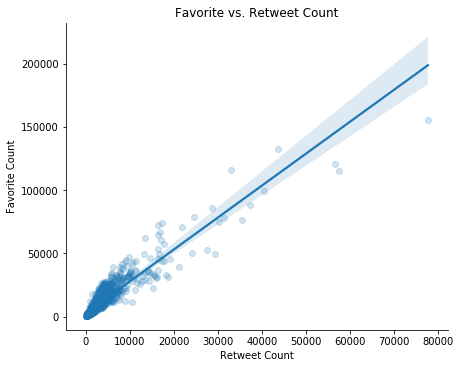

In [153]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

Favorite and retweet counts are highly positively correlated.  For about every 4 favorites there is 1 retweet.  The majority of the data falls below 40000 favorites and 10000 retweets.

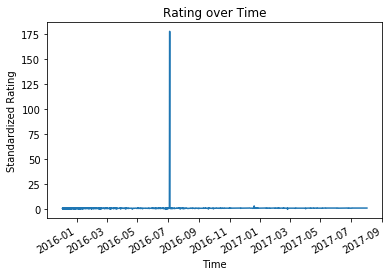

In [154]:
# Plot standardized ratings over time
twitter.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;

In [155]:
# There are 3 outliers with a rating over 2.  
# Find them to see if they are inaccurate or just unique.
twitter.loc[twitter['rating'] > 2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,expanded_urls,numerator,denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
406,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7,Sam,...,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,NaN,3.428571
789,749981277374128128,NaN,NaN,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,...,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,NaN,177.600000


The first instance is a rating of 24/7 which is inaccurate and I had found when looking for quality errors but decided not to fix.  If we were required to fix all problems then thix tweet could be removed but I will ignore in this case.  The other 2 tweets are accurate ratings that are jokes.  I am more interested if the tweets with a standardized rating of below 1 decrease over time therefore I will limit the y axis from 0 to 2.

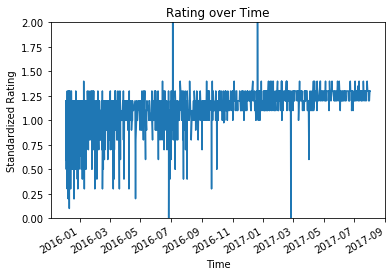

In [156]:
# Plot standardized ratings over time with ylim of 0-2
twitter.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.ylim(0, 2)
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;

Indeed it appears that overtime the frequency of ratings below 1 decreases.  Before 2016-11 there many ratings below 1, while after that time there are barely any.